In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

#To read data from the excel file
data = pd.read_excel('./Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [2]:
#To check if there is any null value in the data and check the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [3]:
# To check if there is any outlier in the data
data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


<AxesSubplot:xlabel='FUEL', ylabel='Count'>

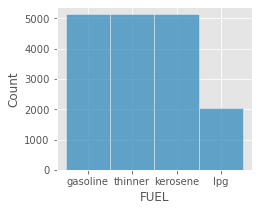

In [5]:
# To check the distribution of different types of fuel
plt.figure(figsize=(3.5,3))
plt.style.use('ggplot')
sns.histplot(data.FUEL)

In [22]:
# Preprocessing the data to convert the categorical data into numerical data using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(data[["FUEL"]])
data["FUEL"] = data_encoded.toarray()
encoder.categories_

[array([0., 1., 2., 3.])]

In [23]:
# Modelling 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X=data.drop(['STATUS'],axis=1)
y=data['STATUS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)
accuracy_score(y_test,y_pred)

0.9378045285182001

In [25]:
# Support vector machine
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# create an SVC object and fit it to the scaled training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_scaled, y_train)

# scale test data using the same StandardScaler object
X_test_scaled = scaler.transform(X_test)

# use the trained SVM to make predictions on test data
y_pred = svm.predict(X_test_scaled)

accuracy_score(y_test,y_pred)


0.8779019776440241

In [12]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test,y_pred)

0.9211808541129264

In [13]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)

accuracy_score(y_test,y_pred)

0.9627400401261106

In [26]:
# Artificial neural network
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_neurons, activation='relu', input_shape=(input_neurons,)),
        tf.keras.layers.Dense(output_neurons, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the number of neurons in each layer
input_neurons = X_train.shape[1]
hidden_neurons = 100
output_neurons = 2

# Create the neural network model
model = create_model()

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

110/110 [==============================] - 0s 559us/step
Accuracy: 0.9254800802522213
Confusion Matrix:
[[1689   72]
 [ 188 1540]]


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from scikeras.wrappers import KerasClassifier


# Stacking meta model (combine previous)
base_models = [
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Neural Network',KerasClassifier(build_fn=create_model, epochs=200, verbose=0))
    ]

stacked = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(),
    cv = 5)

stacked.fit(X_train, y_train)
y_pred = stacked.predict(X_test)

accuracy_score(y_test,y_pred)


c:\Users\Vitor\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
c:\Users\Vitor\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
c:\Users\Vitor\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
c:\Users\Vitor\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
c:\Users\Vitor\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` w

0.939524218973918